### Задание 2 (Вариант 4)


##### Имеем геометрическое распределение $Geom(p)$ с неизвестным параметром $p$, формулой вероятности $f(k) = (1 - p)^{k - 1} \cdot p$, математическим ожиданием $\mu = \frac{1}{p}$ и дисперсией $\sigma^2 = \frac{1 - p}{p^2}$

##### По ЦПТ:

$$
\sqrt(n) \cdot \frac{\overline X - \mu}{\sigma} \xrightarrow{d} N(0, 1)
$$

##### Запишем асимптотический доверительный интервал для закона нормального распределения:

$$
q_{\frac{\alpha}{2}} \leq \sqrt{n} \cdot \frac{\overline X - \frac{1}{p}}{\frac{\sqrt{1 - p}}{p}} \leq q_{1 - \frac{\alpha}{2}}
$$

$$
q_{\frac{\alpha}{2}} \leq \sqrt{n} \cdot \frac{p \overline X - 1}{\sqrt{1 - p}} \leq q_{1 - \frac{\alpha}{2}}
$$

##### Рассмотрим подробнее правое неравенство

$$
p \overline X - 1 \leq \sqrt{\frac{1 - p}{n}} \cdot q_{1 - \frac{\alpha}{2}} \Leftrightarrow
$$

$$
\Leftrightarrow
\left[
\begin{aligned}
&\left\{
\begin{aligned}
&p^2 \overline{X}^2 - \left(2 \overline{X} - \frac{q_{1-\frac{\alpha}{2}}^2}{n}\right) \cdot p + 1 - \frac{q_{1-\frac{\alpha}{2}}^2}{n} \leq 0 \\
&p \overline X - 1 \geq 0
\end{aligned}
\right. \\
&\hspace{1.5em} p \overline{X} - 1 \le 0
\end{aligned}
\right.
$$

##### Расписав левое неравенство, можно убедиться, что получиться то же самое неравенство, только с инвертированными знаками (в силу симметрии $N(0, 1)$). Итоговый асимптотический доверительный интервал $(p_1, p_2)$, где $p_1$ и $p_2$ - корни соответствующего квадратного уравнения

Количество элементов в выборке: 25
Процент попаданий: 950/1000 = 0.95
-------------------------------------
Количество элементов в выборке: 10000
Процент попаданий: 949/1000 = 0.949


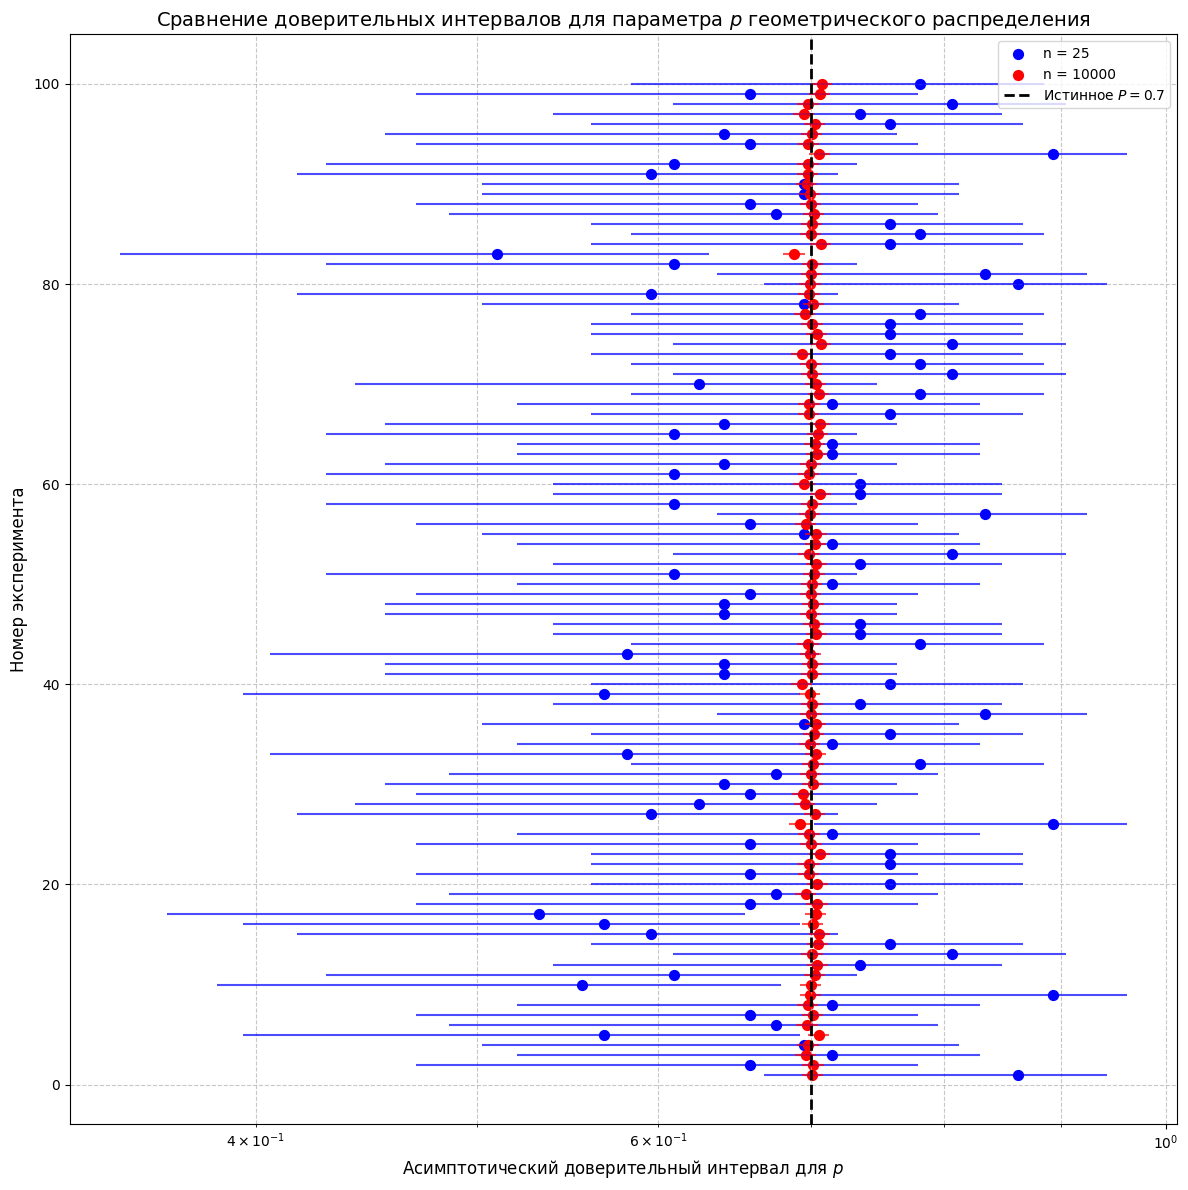

In [162]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

P = 0.7
ALPHA = 0.05
Q = norm.ppf(1 - ALPHA / 2)
N1, N2 = 25, 10000
M = 1000


def CI(sample):
    global Q
    n = len(sample)
    x_overline = np.mean(sample)

    a = x_overline ** 2
    powered_q = Q ** 2 / n
    b = - (2 * x_overline - powered_q)
    c = 1 - powered_q
    sqrt_d = np.sqrt(b ** 2 - 4 * a * c)
    p1, p2 = (- b - sqrt_d) / (2 * a), (- b + sqrt_d) / (2 * a)

    return p1, p2, 1 / x_overline
    # return (p < 1 / x_overline or p1 <= p <= p2) and (p > 1 / x_overline or p1 <= p <= p2)


c1, c2 = 0, 0
ints1, ints2 = [], []
ests1, ests2 = [], []
for _ in range(M):
    sample1 = np.random.geometric(P, size=N1)
    sample2 = np.random.geometric(P, size=N2)
    l1, r1, p1 = CI(sample1)
    l2, r2, p2 = CI(sample2)
    ints1.append((l1, r1))
    ints2.append((l2, r2))
    ests1.append(p1)
    ests2.append(p2)
    c1 += l1 < P < r1
    c2 += l2 < P < r2

print(
    f'Количество элементов в выборке: {N1}',
    f'Процент попаданий: {c1}/{M} = {c1 / M}',
    '-' * 37,
    f'Количество элементов в выборке: {N2}',
    f'Процент попаданий: {c2}/{M} = {c2 / M}',
    sep='\n'
)

CUT = 100
lower1 = [l for l, _ in ints1[:CUT]]
upper1 = [r for _, r in ints1[:CUT]]
lower2 = [l for l, _ in ints2[:CUT]]
upper2 = [r for _, r in ints2[:CUT]]
ests1 = ests1[:CUT]
ests2 = ests2[:CUT]

y_positions = np.arange(CUT, 0, -1)

plt.figure(figsize=(12, 12))

plt.hlines(y_positions, lower1, upper1, color='blue', alpha=0.7, linewidth=1.5)
plt.scatter(ests1, y_positions, color='blue', s=50, label='n = 25')

plt.hlines(y_positions, lower2, upper2, color='red', alpha=0.7, linewidth=1.5)
plt.scatter(ests2, y_positions, color='red', s=50, label='n = 10000')

plt.axvline(P, color='k', linestyle='--', linewidth=2, label=r'Истинное $P = 0.7$')

plt.xscale('log')
plt.xlabel('Асимптотический доверительный интервал для $p$', fontsize=12)
plt.ylabel('Номер эксперимента', fontsize=12)
plt.title('Сравнение доверительных интервалов для параметра $p$ геометрического распределения', fontsize=14)
plt.legend(loc='best', fontsize=10)
plt.grid(True, which="both", ls="--", alpha=0.7)
plt.tight_layout()
plt.show()
